# Projet cours de Machine Learning - UTC 

#### Par Eloise Moreira, Morgan Westmeyer et Damien Dieudonné

## Objectif : prédiction de niveau de revenus

### Importation des bibliothèques

In [134]:
# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABRON
import seaborn as sns

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # normalisation des variables numériques
from sklearn.preprocessing import RobustScaler # normalisation des variables numériques
from sklearn.impute import SimpleImputer # imputation des valeurs manquantes
from sklearn.impute import KNNImputer # imputation des valeurs manquantes par la méthode KNN
from sklearn.feature_selection  import SelectKBest # sélectionner 
from sklearn. preprocessing import PolynomialFeatures 

# MODELES PREDICTIFS

## REGRESSION
from sklearn.linear_model import LogisticRegression # régréssion logistique

## SVM 
from sklearn.svm import LinearSVC # machines à vecteurs de support (linéaire)
from sklearn.svm import SVC # machines à vecteurs de support (non-linéaire)

## SGD
from sklearn.linear_model import SGDClassifier #  classifieurs (SVM, régression logistique, etc.) avec un algorithme SGD

## ARBRES, FORETS, APRRENTISSAGE D'ENSEMBLE
from sklearn.tree import DecisionTreeClassifier # arbres classification
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 

## KNN
from sklearn.neighbors import KNeighborsClassifier # KPP voisins

# VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # séparation des données en train et test set
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyperparamètres
from sklearn.model_selection import RandomizedSearchCV # tester arbitrairement plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION: METRIQUES DE CLASSIFICATION
from sklearn.metrics import accuracy_score # exactitude (accuracy)
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # matrice de confusion
## from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay # graphique de la matrice de confusion
from sklearn.metrics import classification_report # rapport pour le modèle de classification

## EVALUATION: COURBE ROC
from sklearn.metrics import auc # aire sous la courbe 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve #
from sklearn.metrics import f1_score, recall_score


# PIPELINE
from sklearn.pipeline import make_pipeline

# TRANSFORMATEUR COMPOSITE (PRE-PROCESSOR + MODELE)
from sklearn.compose import make_column_transformer


# WARNINGS
import warnings
warnings.filterwarnings('ignore')

## 1. Analyse Exploratoire des données

### 1.1 Analyse de forme : description des variables

#### 1.1.1 Chargement des variables

In [135]:
def load_data(path):
    data = pd.read_csv(path)
    return data.copy()

df_revenus = load_data("data/adult.data")


In [136]:
df_revenus[:20]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


La variable cible ici est le *revenu*

Les autres variables sont des variables explicatives.

In [137]:
def display_class(dataset):
    print("L'enssemble des classes existantes : \n",dataset.columns)
    print("\n ------------------------------- \n")
    print("Valeurs possible des variables non encodé : \n")
    for col in dataset.select_dtypes('object'):
        print(f'{col :-<70} {df_revenus[col].unique()}') # créer un sytème de marge

In [138]:
display_class(df_revenus)

L'enssemble des classes existantes : 
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

 ------------------------------- 

Valeurs possible des variables non encodé : 

workclass------------------------------------------------------------- [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education------------------------------------------------------------- [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status-------------------------------------------------------- [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married

#### 1.1.2 Dimensions des données

In [139]:
def display_dim(dataset):
    n_samples, n_features = dataset.shape
    print("Nombre de lignes (samples): %s" %n_samples)
    print("Nombre de colonnes (features): %s" %n_features)

In [140]:
display_dim(df_revenus)

Nombre de lignes (samples): 32561
Nombre de colonnes (features): 15


##### 1.1.3 Types de variables

In [141]:
def display_type(dataset):
    print(dataset.dtypes)
    plt.figure(figsize=(26, 8))
    dataset.dtypes.value_counts().plot.pie();    

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


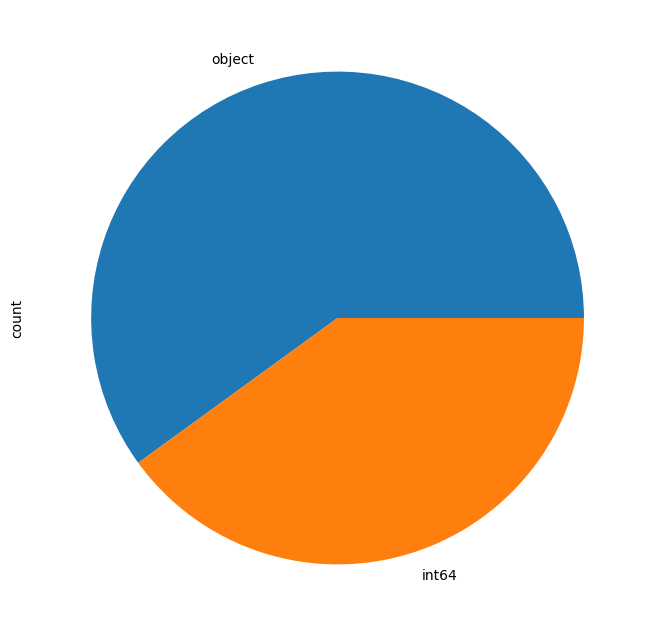

In [142]:
display_type(df_revenus)

#### 1.1.4 Visualisation des valeurs manquantes

In [143]:
def display_missing_values(dataset): 
    print(dataset.isin([" ?"]).mean())

In [144]:
display_missing_values(df_revenus)

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
income            0.000000
dtype: float64


Les valeurs manquantes sont indiquées avec un "?", nous avons donc 5,63% de données manquantes pour la feature "workclass", 5,66% pour la feature "occupation" et 1,79% pour la feature "native-country". 
Aucune ne dépasse 90% donc nous gardons toutes les features.

### 1.2 Analyse univariée: signification des variables

#### 1.2.1 Visualisation de la variable cible (target variable)

In [145]:
df_revenus['income'].value_counts()[0]

np.int64(24720)

In [146]:
def classe_equilibre(dataset,cible):
    count = dataset[cible].value_counts()
    num = len(count)
    total = sum(count)
    for i in range (0, num): 
        print("proportion de la classe", i )
        print(count[i]/total)

In [147]:
classe_equilibre(df_revenus, 'income')  

proportion de la classe 0
0.7591904425539756
proportion de la classe 1
0.2408095574460244


<font color='red'>**Interprétation:**</font> 

On peut affirmer que nos classes ne sont pas équilibrées (unbalanced classes) pour ce dataset. Il faudra prendre ceci en compte lors du choix de la métrique pour l'évaluation d'un algorithme de classification. Sinon, on pourrait procéder à des techniques propores aux problèmes de classes déséquilibres telles que le sous-échantillonnage. 

#### 1.2.2 Histogrammes de valeurs integralles

In [148]:
def display_hist(dataset):
    int_cols = dataset.select_dtypes('int').columns
    num_cols = len(int_cols)

    if num_cols == 0:
        print("Aucune colonne entière dans le dataset.")
        return

    # Déterminer le nombre de lignes et de colonnes pour la disposition des subplots
    num_rows = int(np.ceil(num_cols / 3))  # 3 colonnes par défaut, ajustable
    num_cols_plot = min(num_cols, 3)  # On limite à 3 colonnes

    fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(5 * num_cols_plot, 4 * num_rows))
    axes = axes.flatten()  # Aplatir la grille pour un accès plus simple

    for i, col in enumerate(int_cols):
        sns.histplot(dataset[col], kde=True, ax=axes[i])
        axes[i].set_title(col)

    # Supprimer les axes inutilisés si le nombre de colonnes n'est pas un multiple exact
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


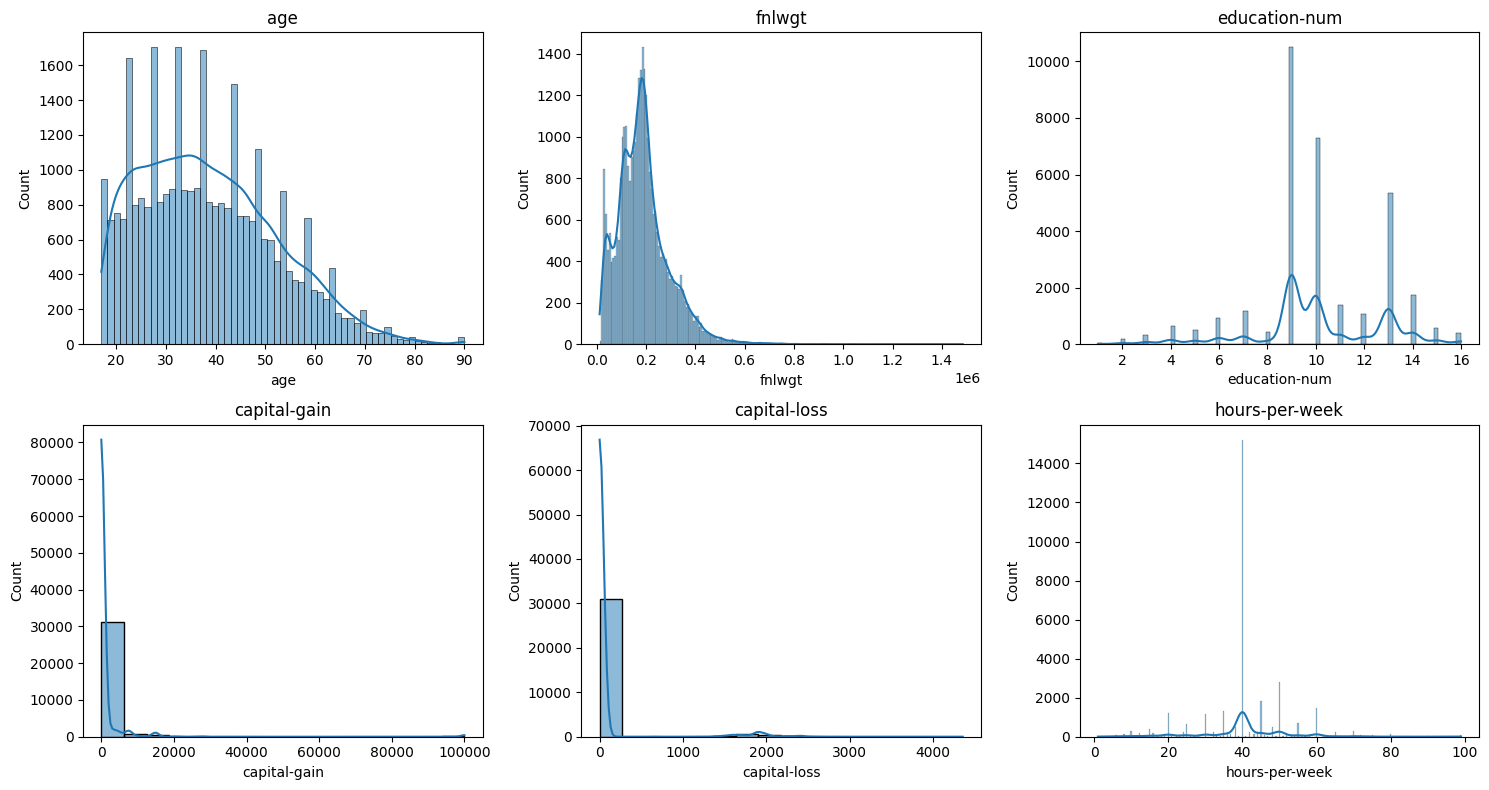

In [149]:
display_hist(df_revenus)

Nous observons des valeurs abérentes pour "Capital-Loss" et "Capital-Gain"

#### 1.2.4 Visualiser les variables qualitatives

##### 1.2.3.1 Voir les différents modalités de chaque variable

In [150]:
def display_pie_charts(dataset):
    cat_cols = dataset.select_dtypes('object').columns
    num_cols = len(cat_cols)

    if num_cols == 0:
        print("Aucune colonne catégorielle dans le dataset.")
        return

    # Déterminer le nombre de lignes et de colonnes pour la disposition des subplots
    num_rows = int(np.ceil(num_cols / 3))  # 3 colonnes par défaut
    num_cols_plot = min(num_cols, 3)  # On limite à 3 colonnes

    fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(5 * num_cols_plot, 4 * num_rows))
    axes = axes.flatten()  # Aplatir la grille pour un accès plus simple

    for i, col in enumerate(cat_cols):
        dataset[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i], startangle=90, cmap='viridis')
        axes[i].set_title(col)
        axes[i].set_ylabel("")  # Supprimer le label de l'axe Y pour plus de clarté

    # Supprimer les axes inutilisés si le nombre de colonnes n'est pas un multiple exact
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


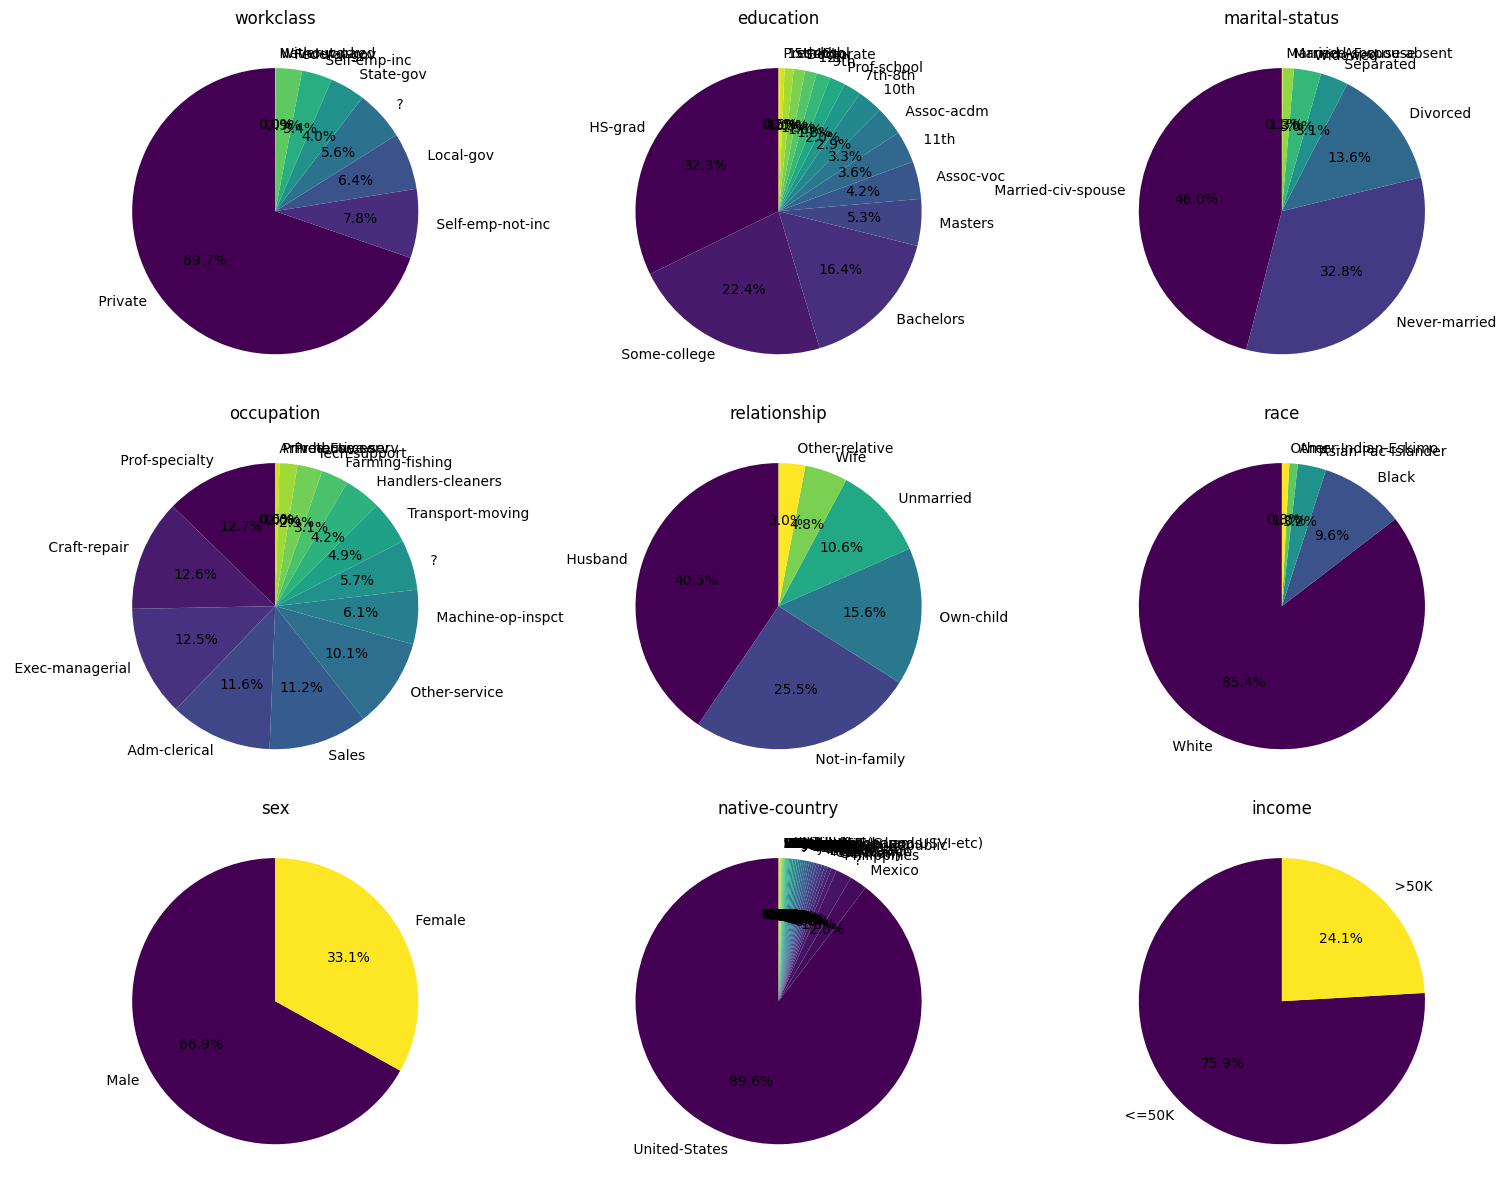

In [151]:
display_pie_charts(df_revenus)

Seul le sexe et l'income sont binaires.

### 1.3 Analyse bivariée : relation entre la variable cible / autre variables

In [152]:
def display_stacked_bar_charts(dataset, target_col):
    cat_cols = dataset.select_dtypes('object').columns
    num_cols = len(cat_cols)

    if num_cols == 0:
        print("Aucune colonne catégorielle dans le dataset.")
        return

    if target_col not in dataset.columns:
        print(f"La colonne cible '{target_col}' n'existe pas dans le dataset.")
        return

    # Déterminer le nombre de lignes et de colonnes pour la disposition des subplots
    num_rows = int(np.ceil(num_cols / 2))  # 2 colonnes par défaut
    num_cols_plot = min(num_cols, 2)  # On limite à 2 colonnes

    fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(6 * num_cols_plot, 5 * num_rows))
    axes = axes.flatten()  # Aplatir la grille pour un accès plus simple

    for i, col in enumerate(cat_cols):
        proportions = dataset.groupby([col, target_col]).size().unstack(fill_value=0)
        proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Normalisation

        proportions.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f"Répartition de {target_col} selon {col}")

    # Supprimer les axes inutilisés si le nombre de colonnes n'est pas un multiple exact
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


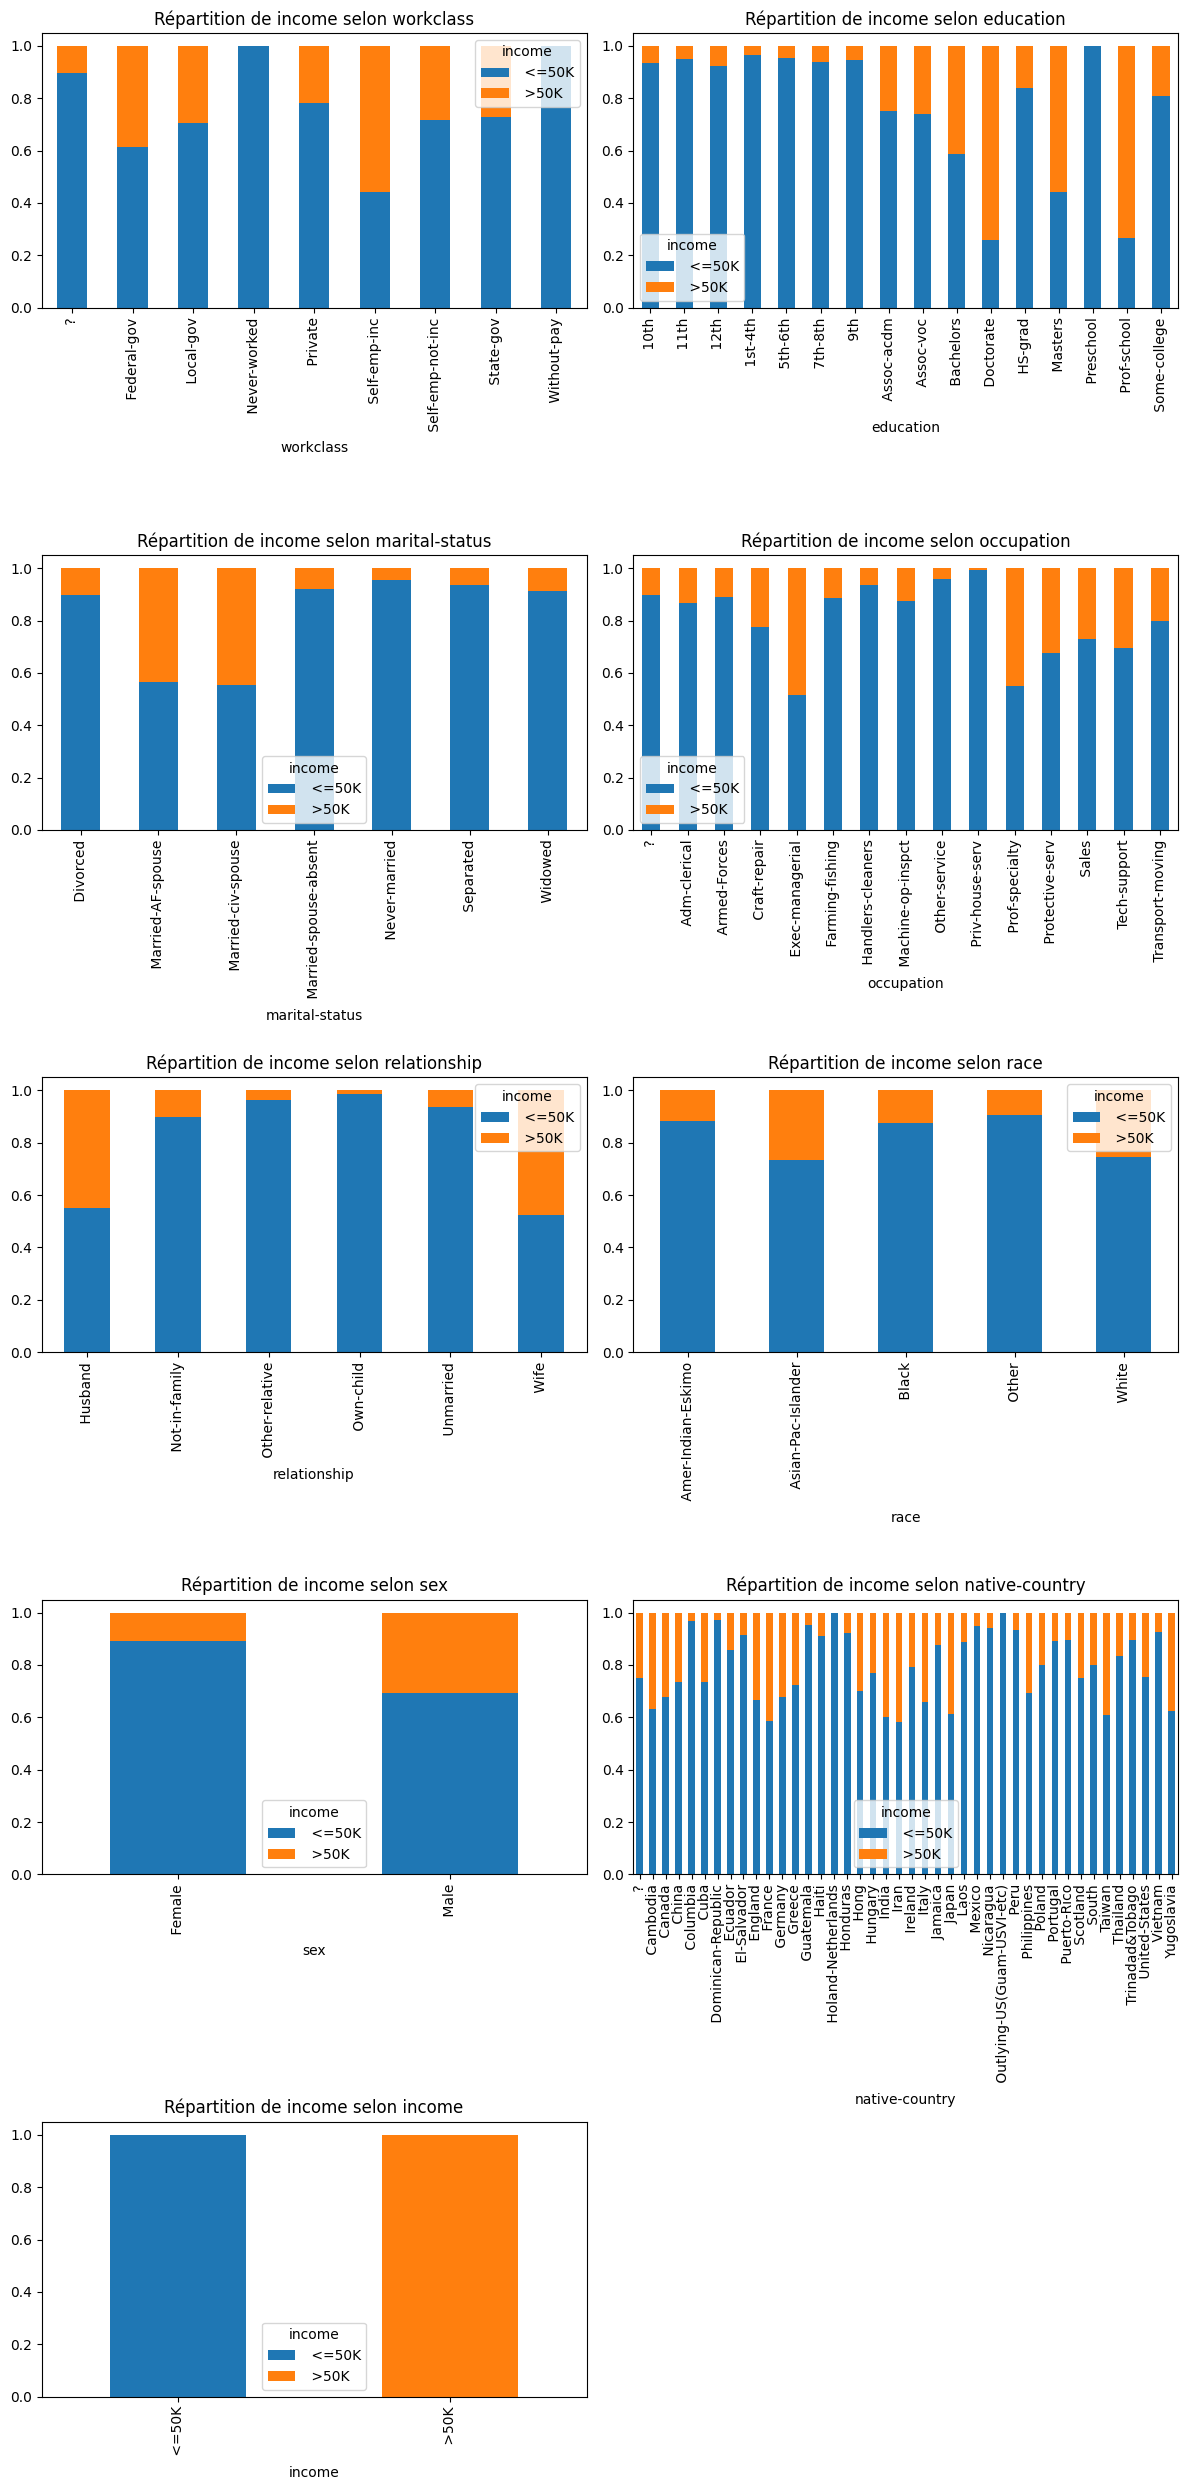

In [153]:
display_stacked_bar_charts(df_revenus,'income')

Affichage des pourcentages de personnes ayant >50k par an et <=50k par an pour chaque variable des features.

Interprétation : Nous pouvons regrouper certaines variables ayant des pourcentages similaires. De plus, seul income et sex auront des encodages binaires. Le reste aura un encodage ordinal en tenant compte des pourcentages présents dans l'analyse (Par exemple, dans workclass : never worked aura un compteur ordinal plus petit que private)

In [154]:
def display_distribution(dataset, target_col):
    int_cols = dataset.select_dtypes('int').columns
    num_cols = len(int_cols)

    if num_cols == 0:
        print("Aucune colonne entière dans le dataset.")
        return

    if target_col not in dataset.columns:
        print(f"La colonne cible '{target_col}' n'existe pas dans le dataset.")
        return

    # Séparation des données selon la valeur cible
    df_revenus_plus = dataset[dataset[target_col] == ' >50K']
    df_revenus_moins = dataset[dataset[target_col] == ' <=50K']

    # Déterminer le nombre de lignes et de colonnes pour la disposition des subplots
    num_rows = int(np.ceil(num_cols / 3))  # 3 colonnes par défaut
    num_cols_plot = min(num_cols, 3)  # On limite à 3 colonnes

    fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(6 * num_cols_plot, 5 * num_rows))
    axes = axes.flatten()  # Aplatir la grille pour un accès plus simple

    for i, feature in enumerate(int_cols):
        sns.histplot(df_revenus_plus[feature], kde=True, label='>50K', ax=axes[i], color='blue', alpha=0.5)
        sns.histplot(df_revenus_moins[feature], kde=True, label='<=50K', ax=axes[i], color='red', alpha=0.5)

        axes[i].set_title(feature)
        axes[i].legend()

    # Supprimer les axes inutilisés si le nombre de colonnes n'est pas un multiple exact
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


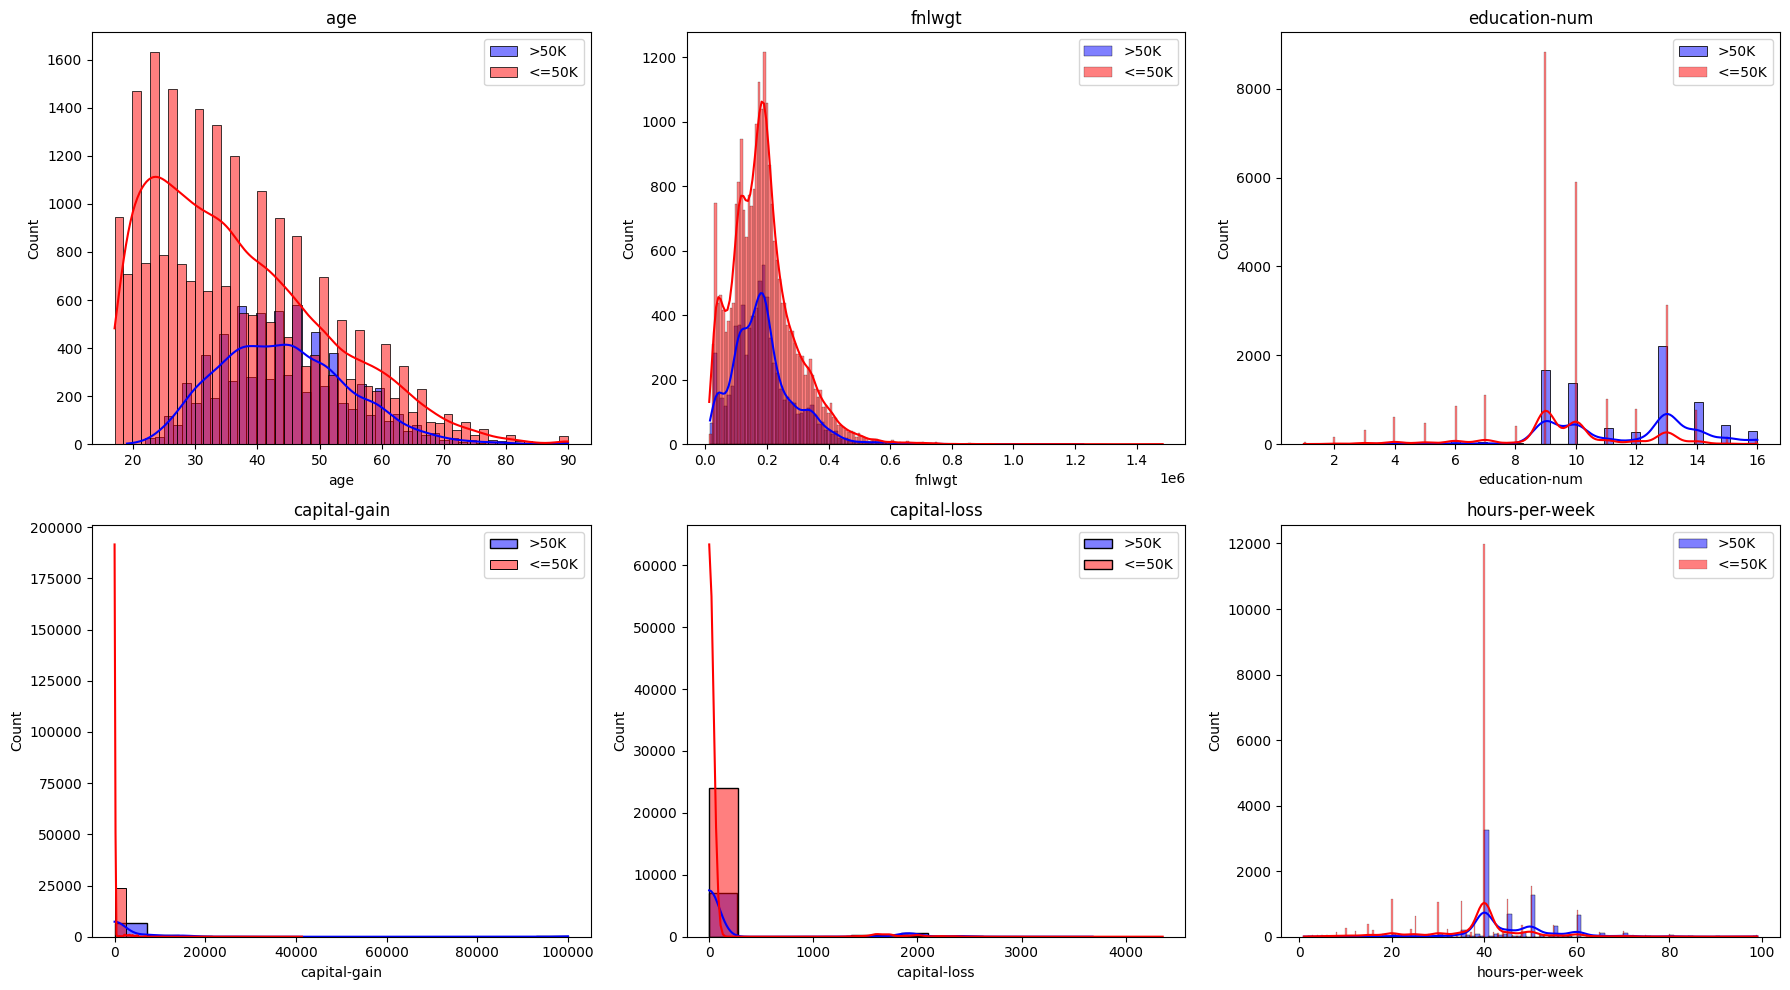

In [155]:
display_distribution(df_revenus,'income')

On observe des ≠ pour ces variables. Par exemple, plus une personne est agée, plus elle est sucéptible d'avoir un income >50k.
Nous observons de même que fnlwgt est très similaire pour les deux groupes. Sachant que cette variable est calculée en fonction de l'age, du sex et de la race, et que nous observons des différences dans chacune des variables individuellement, il serait judicieux de le retirer pour ne garder que les autres.

In [156]:
int_features = df_revenus.select_dtypes(include=["int"]).columns
int_features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

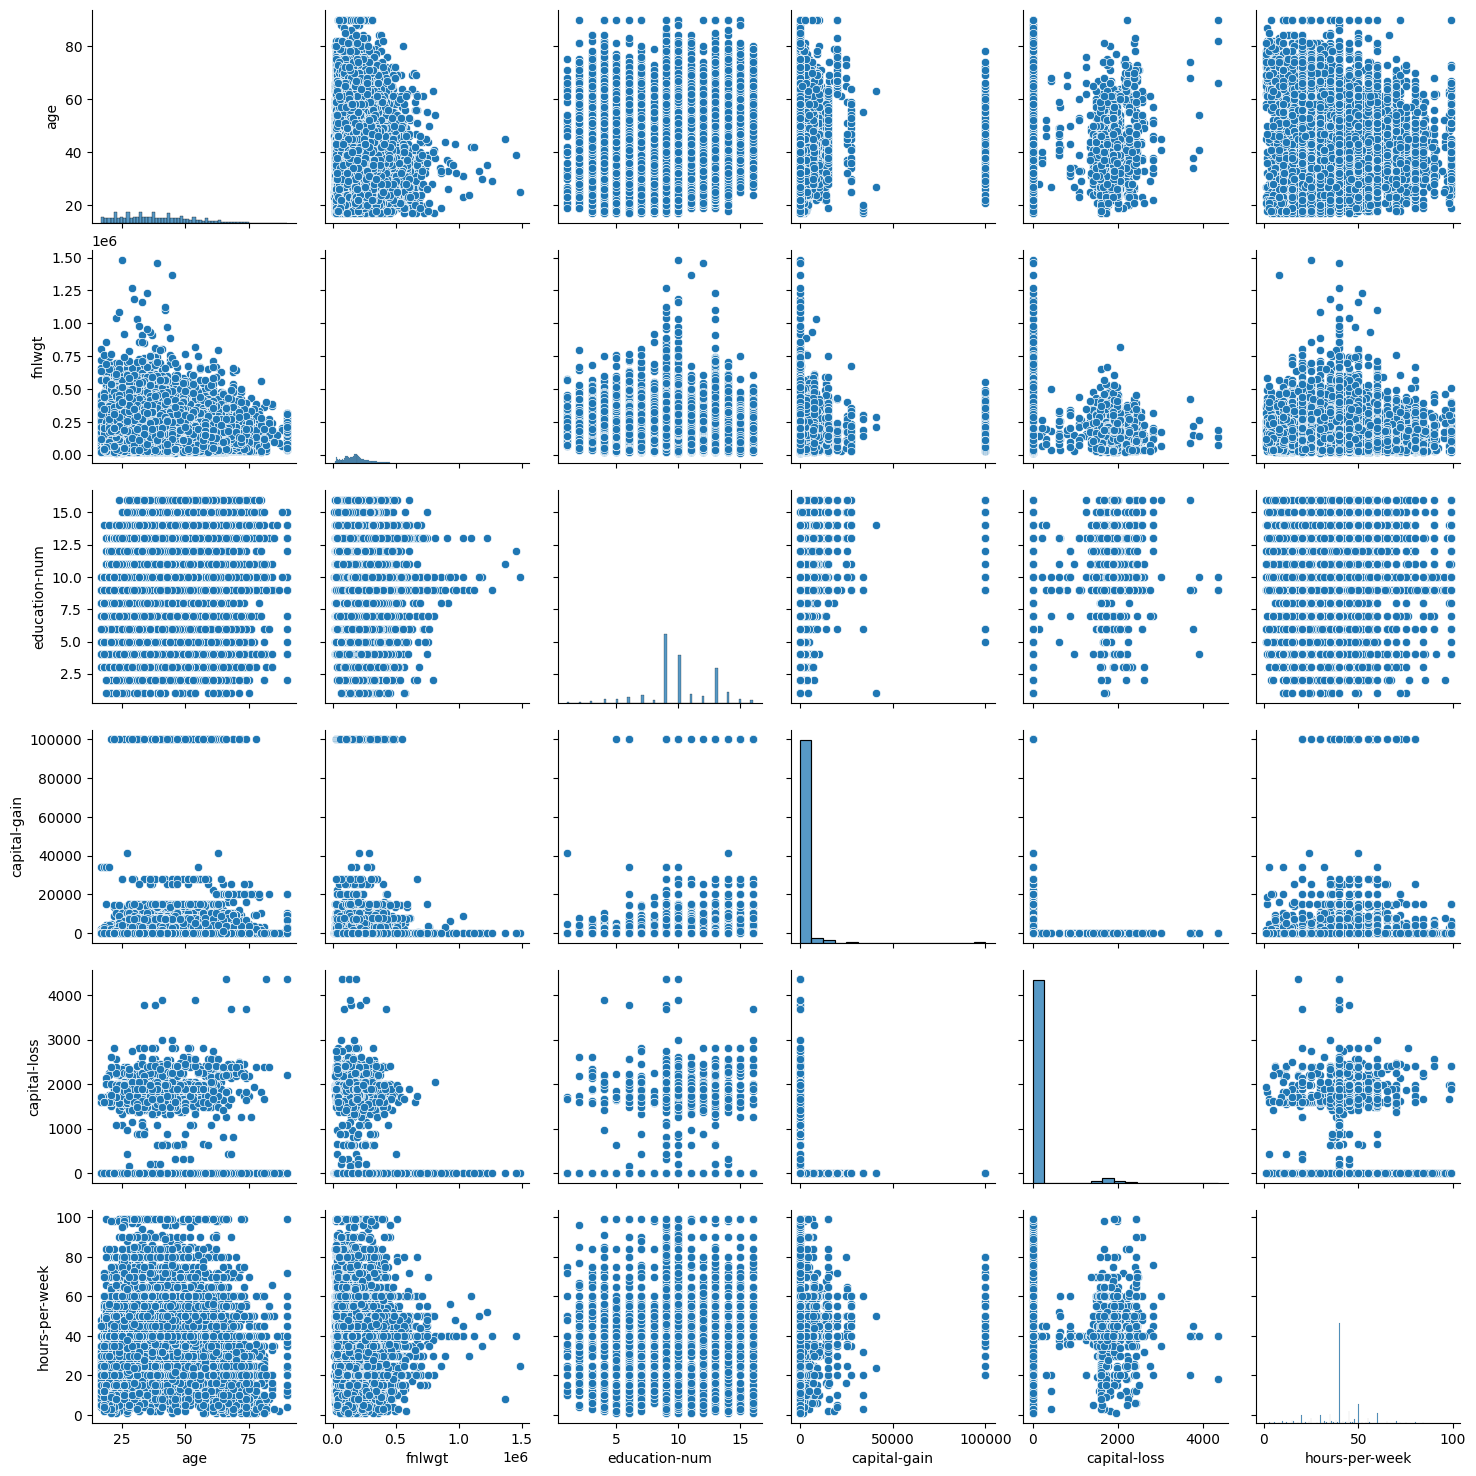

In [157]:
sns.pairplot(df_revenus[int_features])
plt.show()

In [158]:
def heatmap(dataset): 
    plt.figure(figsize=(26, 12))
    sns.heatmap(dataset[int_features].corr(), annot=True, cbar=False) # très utile
    plt.show()

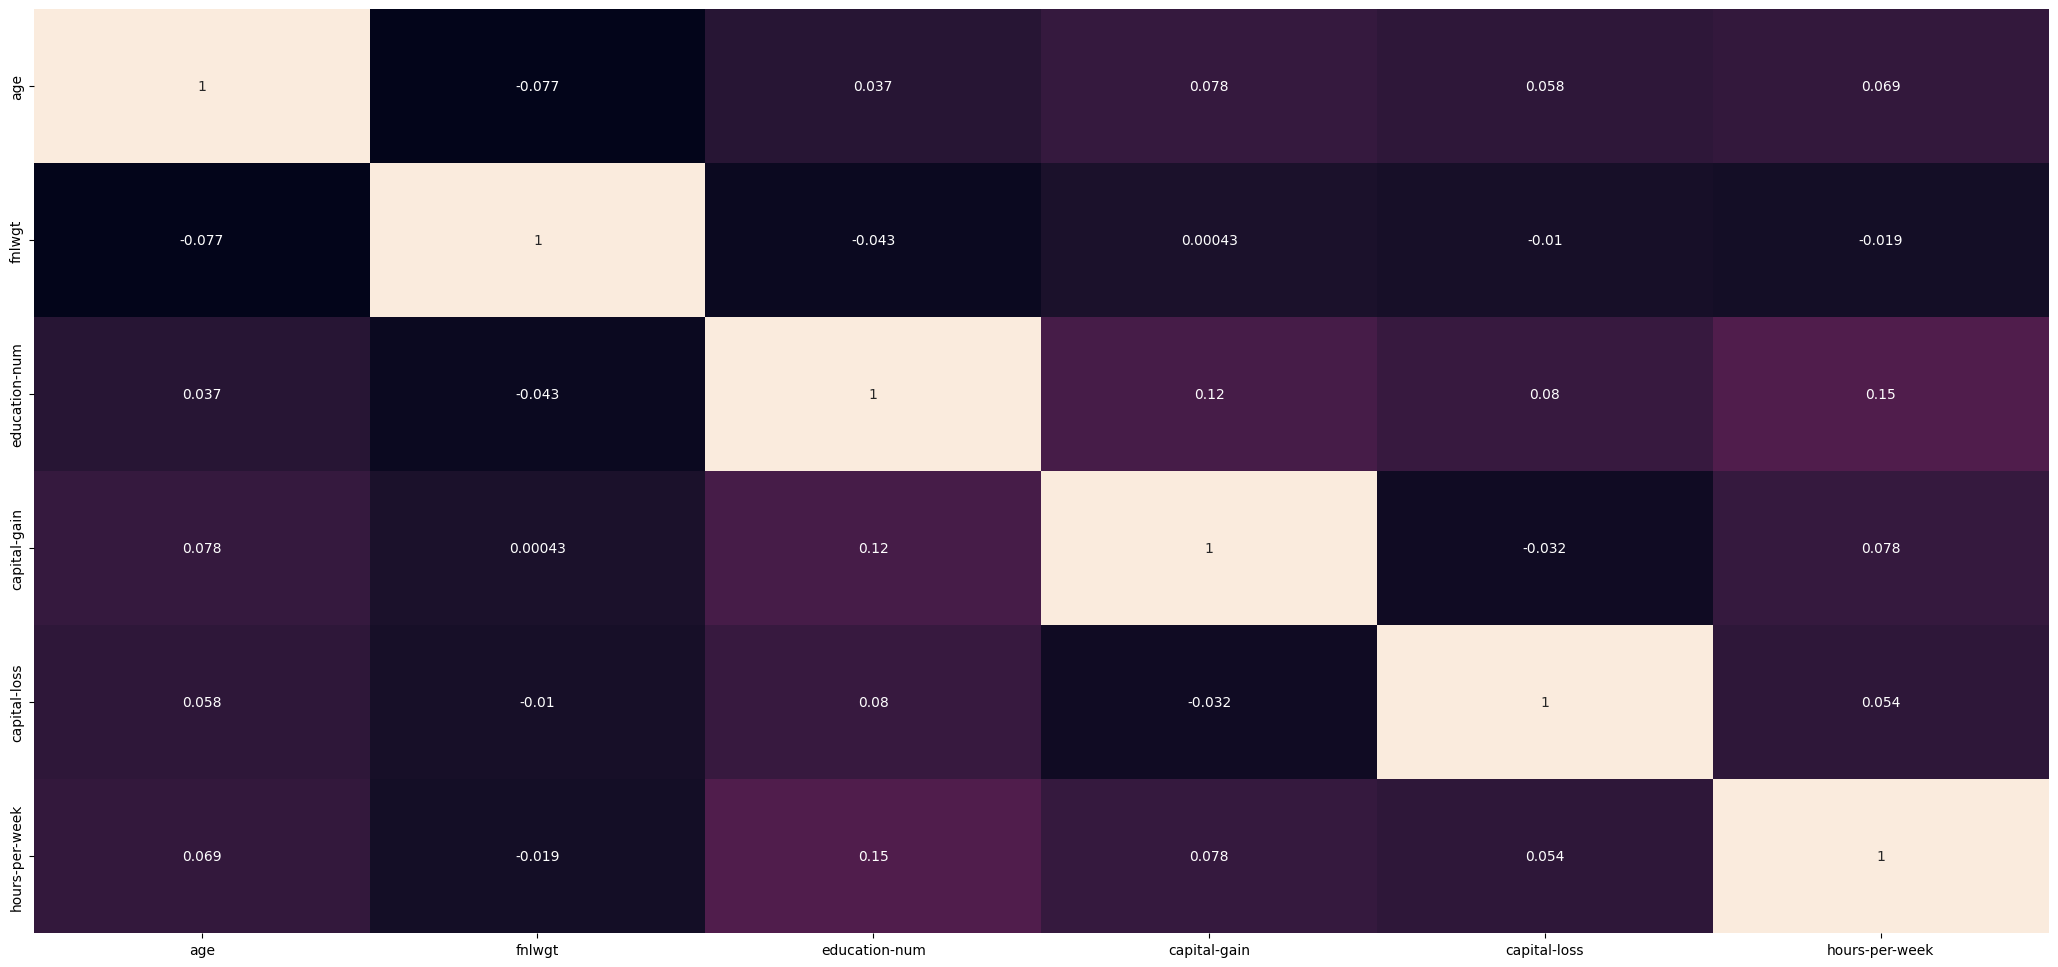

In [159]:
heatmap(df_revenus)

Pas de corrélation entre les variables

## 2. Pré-traitement de données

Dans notre cas, nous avons deux dataset, un prévu pour le train et l'autre pour le test. Nous n'avons donc pas besoin de séparer les dataset.

In [160]:
def load_data(train, test):
    data_1 = pd.read_csv(train)
    data_train = data_1.copy()
    data_2 = pd.read_csv(test)
    data_test = data_2.copy()
    return data_train, data_test

In [161]:
df_revenus_train, df_revenus_test = load_data("data/adult.data", "data/adult.test")

In [171]:
def check_missing_values(dataset):
    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            print(col, dataset[col][dataset[col] == ' ?'].count())

On va supprimer les individus au moins une valeur inconnue. Par soucis de simplicité et popur éviter les biais

In [177]:
check_missing_values(df_revenus_train_clean)
check_missing_values(df_revenus_test_clean)

workclass 0
education 0
marital-status 0
occupation 7
relationship 0
race 0
sex 0
native-country 556
income 0
workclass 0
education 0
marital-status 0
occupation 3
relationship 0
race 0
sex 0
native-country 255
income 0
